In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_excel('219_student.xlsx')

# A1: Calculate Entropy
def calculate_entropy(column):
    """Calculate entropy for a given column."""
    probabilities = column.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage for entropy
target_column = 'Number'
entropy_value = calculate_entropy(df[target_column])

# A2: Calculate Gini Index
def gini_index(column):
    """Calculate Gini index for a given column."""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

gini_value = gini_index(df[target_column])

# A3: Information Gain for Root Node
def calculate_information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()
    feature_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset[target])
    return total_entropy - feature_entropy

# A4: Binning Function
def bin_column(df, column, bins=4, strategy='uniform'):
    """Convert continuous data into categorical using binning."""
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    df[column] = kbins.fit_transform(df[[column]])
    return df

# Apply binning
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in continuous_columns:
    df = bin_column(df, col, bins=4, strategy='uniform')

# A5: Build Decision Tree
features = df.drop(target_column, axis=1)
target = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# A6: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=[str(cls) for cls in target.unique()], filled=True)
plt.show()

# A7: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    """Plot decision boundary for 2D feature space."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Select two features for visualization
X_two_features = features.iloc[:, :2].values
dt_model_two_features = DecisionTreeClassifier(criterion='entropy')
dt_model_two_features.fit(X_two_features, target)
plot_decision_boundary(dt_model_two_features, X_two_features, target)


Saving 219_student.xlsx to 219_student (7).xlsx
Entropy of 'Number': 5.209453365628953


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_excel('219_student.xlsx')

# A1: Calculate Entropy
def calculate_entropy(column):
    """Calculate entropy for a given column."""
    probabilities = column.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage for entropy
target_column = 'Number'
entropy_value = calculate_entropy(df[target_column])

# A2: Calculate Gini Index
def gini_index(column):
    """Calculate Gini index for a given column."""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

gini_value = gini_index(df[target_column])

# A3: Information Gain for Root Node
def calculate_information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()
    feature_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset[target])
    return total_entropy - feature_entropy

# A4: Binning Function
def bin_column(df, column, bins=4, strategy='uniform'):
    """Convert continuous data into categorical using binning."""
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    df[column] = kbins.fit_transform(df[[column]])
    return df

# Apply binning
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in continuous_columns:
    df = bin_column(df, col, bins=4, strategy='uniform')

# A5: Build Decision Tree
features = df.drop(target_column, axis=1)
target = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# A6: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=[str(cls) for cls in target.unique()], filled=True)
plt.show()

# A7: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    """Plot decision boundary for 2D feature space."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Select two features for visualization
X_two_features = features.iloc[:, :2].values
dt_model_two_features = DecisionTreeClassifier(criterion='entropy')
dt_model_two_features.fit(X_two_features, target)
plot_decision_boundary(dt_model_two_features, X_two_features, target)


Gini Index of Number: 0.972972972972973


In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_excel('219_student.xlsx')

# A1: Calculate Entropy
def calculate_entropy(column):
    """Calculate entropy for a given column."""
    probabilities = column.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage for entropy
target_column = 'Number'
entropy_value = calculate_entropy(df[target_column])

# A2: Calculate Gini Index
def gini_index(column):
    """Calculate Gini index for a given column."""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

gini_value = gini_index(df[target_column])

# A3: Information Gain for Root Node
def calculate_information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()
    feature_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset[target])
    return total_entropy - feature_entropy

# A4: Binning Function
def bin_column(df, column, bins=4, strategy='uniform'):
    """Convert continuous data into categorical using binning."""
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    df[column] = kbins.fit_transform(df[[column]])
    return df

# Apply binning
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in continuous_columns:
    df = bin_column(df, col, bins=4, strategy='uniform')

# A5: Build Decision Tree
features = df.drop(target_column, axis=1)
target = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# A6: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=[str(cls) for cls in target.unique()], filled=True)
plt.show()

# A7: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    """Plot decision boundary for 2D feature space."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Select two features for visualization
X_two_features = features.iloc[:, :2].values
dt_model_two_features = DecisionTreeClassifier(criterion='entropy')
dt_model_two_features.fit(X_two_features, target)
plot_decision_boundary(dt_model_two_features, X_two_features, target)


In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_excel('219_student.xlsx')

# A1: Calculate Entropy
def calculate_entropy(column):
    """Calculate entropy for a given column."""
    probabilities = column.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage for entropy
target_column = 'Number'
entropy_value = calculate_entropy(df[target_column])

# A2: Calculate Gini Index
def gini_index(column):
    """Calculate Gini index for a given column."""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

gini_value = gini_index(df[target_column])

# A3: Information Gain for Root Node
def calculate_information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()
    feature_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset[target])
    return total_entropy - feature_entropy

# A4: Binning Function
def bin_column(df, column, bins=4, strategy='uniform'):
    """Convert continuous data into categorical using binning."""
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    df[column] = kbins.fit_transform(df[[column]])
    return df

# Apply binning
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in continuous_columns:
    df = bin_column(df, col, bins=4, strategy='uniform')

# A5: Build Decision Tree
features = df.drop(target_column, axis=1)
target = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# A6: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=[str(cls) for cls in target.unique()], filled=True)
plt.show()

# A7: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    """Plot decision boundary for 2D feature space."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Select two features for visualization
X_two_features = features.iloc[:, :2].values
dt_model_two_features = DecisionTreeClassifier(criterion='entropy')
dt_model_two_features.fit(X_two_features, target)
plot_decision_boundary(dt_model_two_features, X_two_features, target)


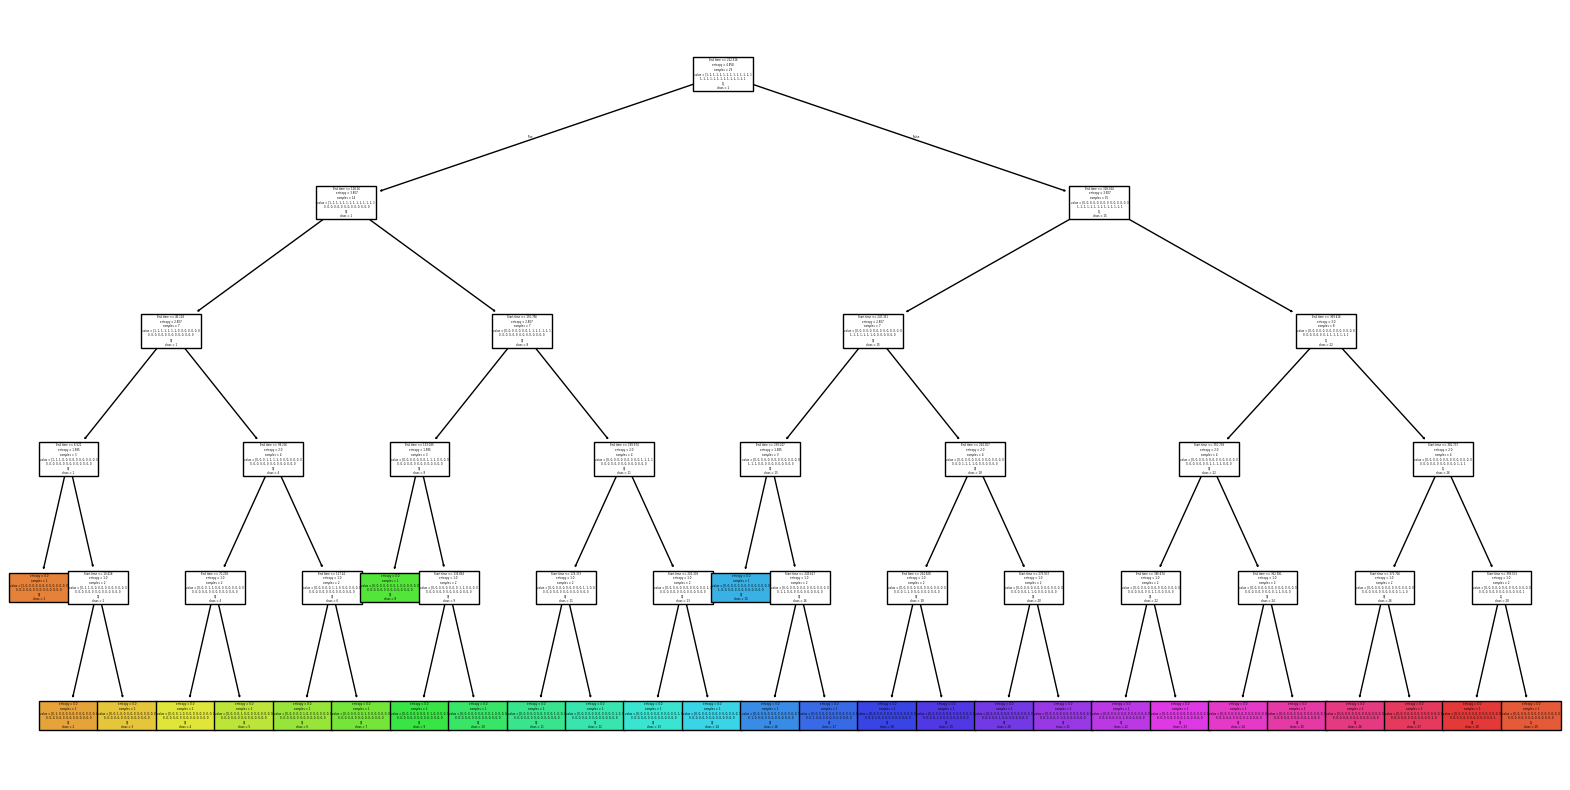

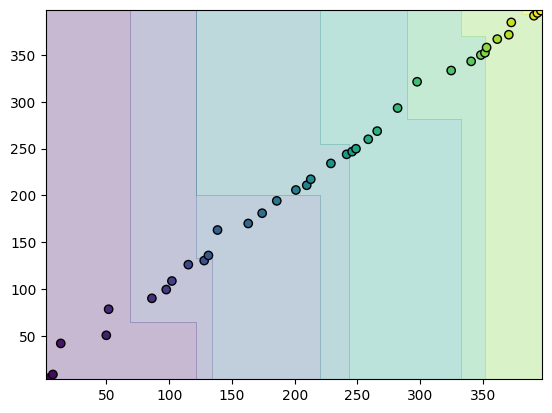

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_excel('219_student.xlsx')

# A1: Calculate Entropy
def calculate_entropy(column):
    """Calculate entropy for a given column."""
    probabilities = column.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage for entropy
target_column = 'Number'
entropy_value = calculate_entropy(df[target_column])

# A2: Calculate Gini Index
def gini_index(column):
    """Calculate Gini index for a given column."""
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

gini_value = gini_index(df[target_column])

# A3: Information Gain for Root Node
def calculate_information_gain(df, feature, target):
    """Calculate Information Gain for a given feature."""
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()
    feature_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset[target])
    return total_entropy - feature_entropy

# A4: Binning Function
def bin_column(df, column, bins=4, strategy='uniform'):
    """Convert continuous data into categorical using binning."""
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    df[column] = kbins.fit_transform(df[[column]])
    return df

# Apply binning
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in continuous_columns:
    df = bin_column(df, col, bins=4, strategy='uniform')

# A5: Build Decision Tree
features = df.drop(target_column, axis=1)
target = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# A6: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=[str(cls) for cls in target.unique()], filled=True)
plt.show()

# A7: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    """Plot decision boundary for 2D feature space."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Select two features for visualization
X_two_features = features.iloc[:, :2].values
dt_model_two_features = DecisionTreeClassifier(criterion='entropy')
dt_model_two_features.fit(X_two_features, target)
plot_decision_boundary(dt_model_two_features, X_two_features, target)
